#Exercise
The dataset is about the image data of natural scenes around the world. This dataset size 150 x 150 distributed under 6 categories as follows:
 
0 - buildings
 
1 - forest
 
2 - glacier
 
3 - mountain
 
4 - sea
 
5 - street
 
The train and test are separated in each files. 
 
Conduct an analysis using an appropriate deep learning model. You are required to improve the performance of the model. 

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.utils import to_categorical
from keras import initializers
from keras import regularizers

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# First path in below cell - Your Google Drive file location which you want to Unzip
# Second path in below cell - Path where you want to extract the zip file in Google
!unzip "/drive/My Drive/Colab Notebooks/nature.zip" -d "/drive/My Drive/Colab Notebooks/nature"

Archive:  /drive/My Drive/Colab Notebooks/nature.zip
replace /drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test/buildings/20057.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
# Set the paths to your train and test image folders
train_path = "/drive/My Drive/Colab Notebooks/nature/nature/seg_train/seg_train"
test_path = "/drive/My Drive/Colab Notebooks/nature/nature/seg_test/seg_test"

In [3]:
# List out the folders 
import os

folders = os.listdir(train_path)

for folder in folders:
    if os.path.isdir(os.path.join(train_path, folder)):
        print(folder)

buildings
forest
glacier
mountain
sea
street


# Image Feature Extraction

https://www.kaggle.com/code/vipulshahi/cnn-natural-images

# Generate Train Data

In [4]:

items = ['buildings','forest','glacier','mountain','sea','street']

import cv2
from tqdm import tqdm

features = []
for i in items:
    for img in tqdm((os.listdir(os.path.join(train_path,i)))):
        im = cv2.imread(os.path.join(os.path.join(train_path,i) , img))
        #im = cv2.cvtColor(im , cv2.COLOR_BGR2GRAY)
        im = cv2.resize(im , (100,100))
        features.append(im)

100%|██████████| 510/510 [00:06<00:00, 84.03it/s] 


In [5]:
import numpy as np
X_train = np.array(features)
X_train.shape

(2700, 100, 100, 3)

In [6]:
labels = []
k = 0
for i in items:
    for img in tqdm((os.listdir(os.path.join(train_path,i)))):
        labels.append(k)
    k = k+1

100%|██████████| 510/510 [00:00<00:00, 1104334.04it/s]


In [7]:
Y_train = np.array(labels)
Y_train.shape

(2700,)

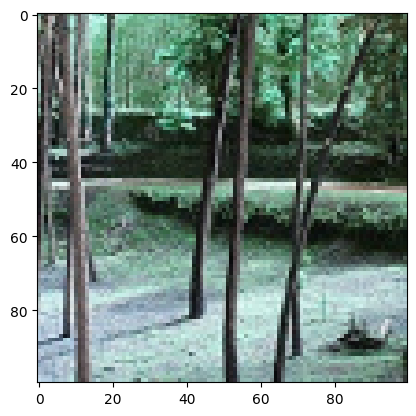

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[677])
plt.show()

In [9]:
print(Y_train[677])

1


# Generate Test Data

In [10]:

items = ['buildings','forest','glacier','mountain','sea','street']

import cv2
from tqdm import tqdm

features_test = []
for i in items:
    for img in tqdm((os.listdir(os.path.join(test_path,i)))):
        im = cv2.imread(os.path.join(os.path.join(test_path,i) , img))
        #im = cv2.cvtColor(im , cv2.COLOR_BGR2GRAY)
        im = cv2.resize(im , (100,100))
        features_test.append(im)

100%|██████████| 90/90 [00:17<00:00,  5.14it/s]


In [11]:
import numpy as np
X_test = np.array(features_test)
X_test.shape

(536, 100, 100, 3)

In [12]:
labels_test = []
k = 0
for i in items:
    for img in tqdm((os.listdir(os.path.join(test_path,i)))):
        labels_test.append(k)
    k = k+1

100%|██████████| 90/90 [00:00<00:00, 815307.47it/s]


In [13]:
Y_test = np.array(labels_test)
Y_test.shape

(536,)

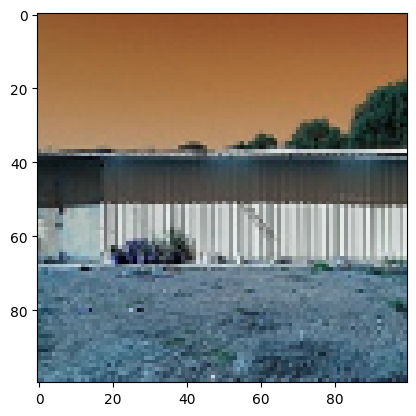

In [14]:
plt.imshow(X_test[72])
plt.show()

In [15]:
print(Y_test[72])

0


# Train & test data processing

In [16]:
# printing final shape

print("x_train shape", X_train.shape)   
print("y_train shape", Y_train.shape)
print("x_test shape", X_test.shape)
print("y_test shape", Y_test.shape)


x_train shape (2700, 100, 100, 3)
y_train shape (2700,)
x_test shape (536, 100, 100, 3)
y_test shape (536,)


In [19]:
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding
y_train = to_categorical(Y_train)
y_test= to_categorical(Y_test)

In [20]:
y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

# Building CNN model

In [24]:
L1=32
L2=64
L3=512

model=Sequential()
model.add(Conv2D(L1,(3,3),activation='relu', input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(rate = 0.2))
model.add(Conv2D(L2,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(L3,activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6,activation='softmax'))  

In [25]:
model.compile(loss='categorical_crossentropy',optimizer='adam',
              metrics=['accuracy'])

In [28]:
history = model.fit(X_train,y_train , epochs=15, batch_size=32,
         validation_data = (X_test , y_test))

Epoch 1/15
85/85 [==============================] - 64s 755ms/step - loss: 1.7140 - accuracy: 0.2670 - val_loss: 1.6742 - val_accuracy: 0.3433
Epoch 2/15
85/85 [==============================] - 62s 727ms/step - loss: 1.4549 - accuracy: 0.4322 - val_loss: 1.4464 - val_accuracy: 0.4384
Epoch 3/15
85/85 [==============================] - 55s 653ms/step - loss: 1.3749 - accuracy: 0.4722 - val_loss: 1.4511 - val_accuracy: 0.4366
Epoch 4/15
85/85 [==============================] - 58s 687ms/step - loss: 1.3298 - accuracy: 0.4930 - val_loss: 1.4033 - val_accuracy: 0.4459
Epoch 5/15
85/85 [==============================] - 56s 657ms/step - loss: 1.3071 - accuracy: 0.5056 - val_loss: 1.3294 - val_accuracy: 0.4795
Epoch 6/15
85/85 [==============================] - 57s 667ms/step - loss: 1.2798 - accuracy: 0.5170 - val_loss: 1.3215 - val_accuracy: 0.4832
Epoch 7/15
85/85 [==============================] - 55s 652ms/step - loss: 1.2557 - accuracy: 0.5137 - val_loss: 1.3305 - val_accuracy: 0.4720

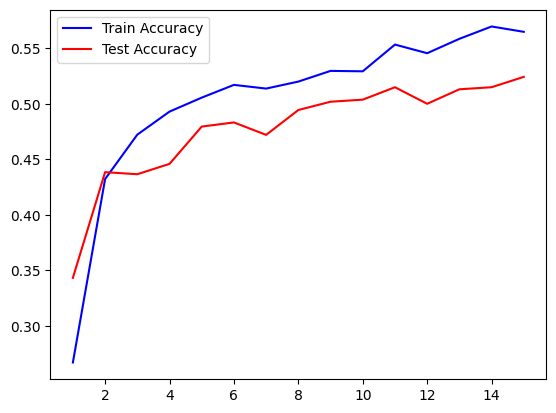

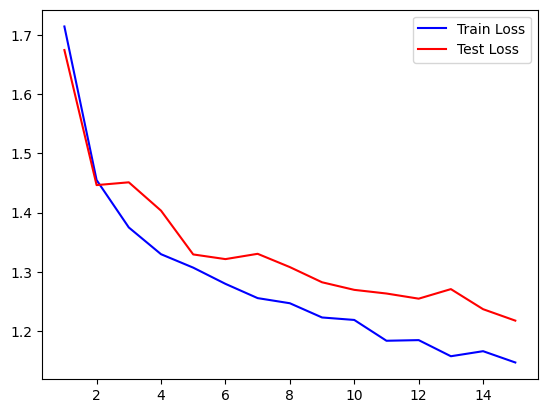

In [29]:
import matplotlib.pyplot as plt

acc2 =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()